# **Data visualization**

*“Data is the new oil? No, data is the new soil.” — David McCandless*

> ![texto alternativo](https://miro.medium.com/max/400/1*lBRfBvVMaqvnLApxcclQAA.jpeg)




From perspective of building models, by visualizing the data we can find the hidden patterns, explore if there are any clusters within data and we can find if they are linearly separable/too much overlapped, etc. 

This part of data visualization is predominant in initial Exploratory Data Analysis (EDA) on the field of Data Mining. 

# **Which language can I use?**
![texto alternativo](https://miro.medium.com/max/500/1*p9bMmiykEv0X1AVV_TRllA.jpeg)

*Which one to learn and which one has a better scope ? It’s purely your choice.*

`R` is way more statistical language and has several great packages for Data science applications, whereas `Python` is widely used in general purpose programming as well as for Data Science and ML related applications. 

# **Plotting data with Python:**

`Python` has several packages to plot the data and among them `Matplotlib` is the most useful one. `Seaborn` is also a great package which offers a lot more appealing plot and even it uses matplotlib as its base layer. There are also many similar type of plots available in `Pandas` when the entire data is stored in a pandas dataframe.

# **Matplotlib**
[Documentación.](https://www.aosabook.org/en/matplotlib.html)

In [0]:
#Importing libraries 
import matplotlib.pyplot as plt
import seaborn as sns


**Different types of plots**


1. Scatter plot
2. Pair plot
3. Box plot 
4. Violin plot
5. Distribution plot 
6. Joint plot
7. Bar chart 
8. Line plot


## ***1.  Scatter plot:***

As far as ML/DS is concerned, one of the most commonly used plot for simple data visualization is scatter plots. This plot gives us a representation of where each points in the entire dataset are present with respect to any 2/3 features (Columns). Scatter plots are available in 2D and 3D. The 2D scatter plot is the important/common one, where we will primarily find patterns/Clusters and separability of the data. The code for using a scatter plot is as shown below.

`plt.scatter(x,y)`

In [0]:
# import load_iris function from datasets module
# convention is to import modules instead of sklearn as a whole
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [0]:
data['target'].replace(0.0, 'setosa', inplace = True)
data['target'].replace(1, 'versicolor', inplace = True)
data['target'].replace(2, 'virginica', inplace = True)

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Text(0.5, 1.0, 'Scatter plot on Iris dataset')

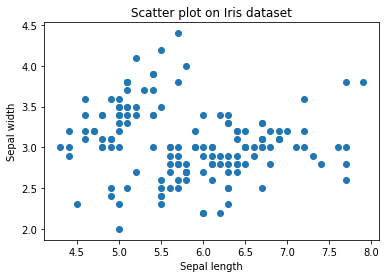

In [6]:
plt.scatter(data['sepal length (cm)'],data['sepal width (cm)'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter plot on Iris dataset')

Now how it would be if we can color the points as per their class label. Here the class labels are Setosa, Virginica and Veriscolor. This is where `Seaborn` pops up, which provides a high-level interface to draw statistical graphics. [Tutorial.](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034361&utm_targetid=dsa-473406580275&utm_loc_interest_ms=&utm_loc_physical_ms=1003659&gclid=CjwKCAiAzJLzBRAZEiwAmZb0asme-sd8SekFUeNSFUrkKrmodzHKlNPLgrdKZnegre186Y36GPS4mxoCpVEQAvD_BwE)

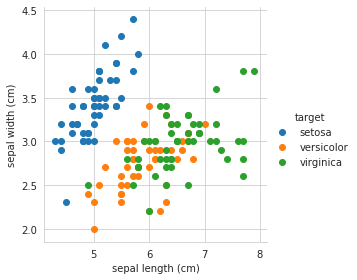

In [7]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="target", height=4) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()
plt.show()

We can conclude that setosa flowers are well separated from the other two classes and also there are some overlaps between virginica and versicolor. The parameter `hue`, in the `facetGrid` decides the color of each datapoints. Here we used `target` column (dependent feature/Class) in `hue`, so that we got this plot colored in this manner.

For a 3D representation we can use [plot.ly](https://plot.ly/python/3d-scatter-plots/)

In [8]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

## ***2. Pair plots:***

What to do when we have 4D or more than that? This is when Pair plot from seaborn package comes into play.
[Documentation of pairplot.](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Lets say we have $n$ number of features in a data, Pair plot will create us a $(n \times n)$ figure where the diagonal plots will be histogram plot of the feature corresponding to that row and rest of the plots are the combination of feature from each row in $y$ axis and feature from each column in $x$ axis.

The code snippet for pair plot implemented for Iris dataset is provided below.

```
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()
```



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



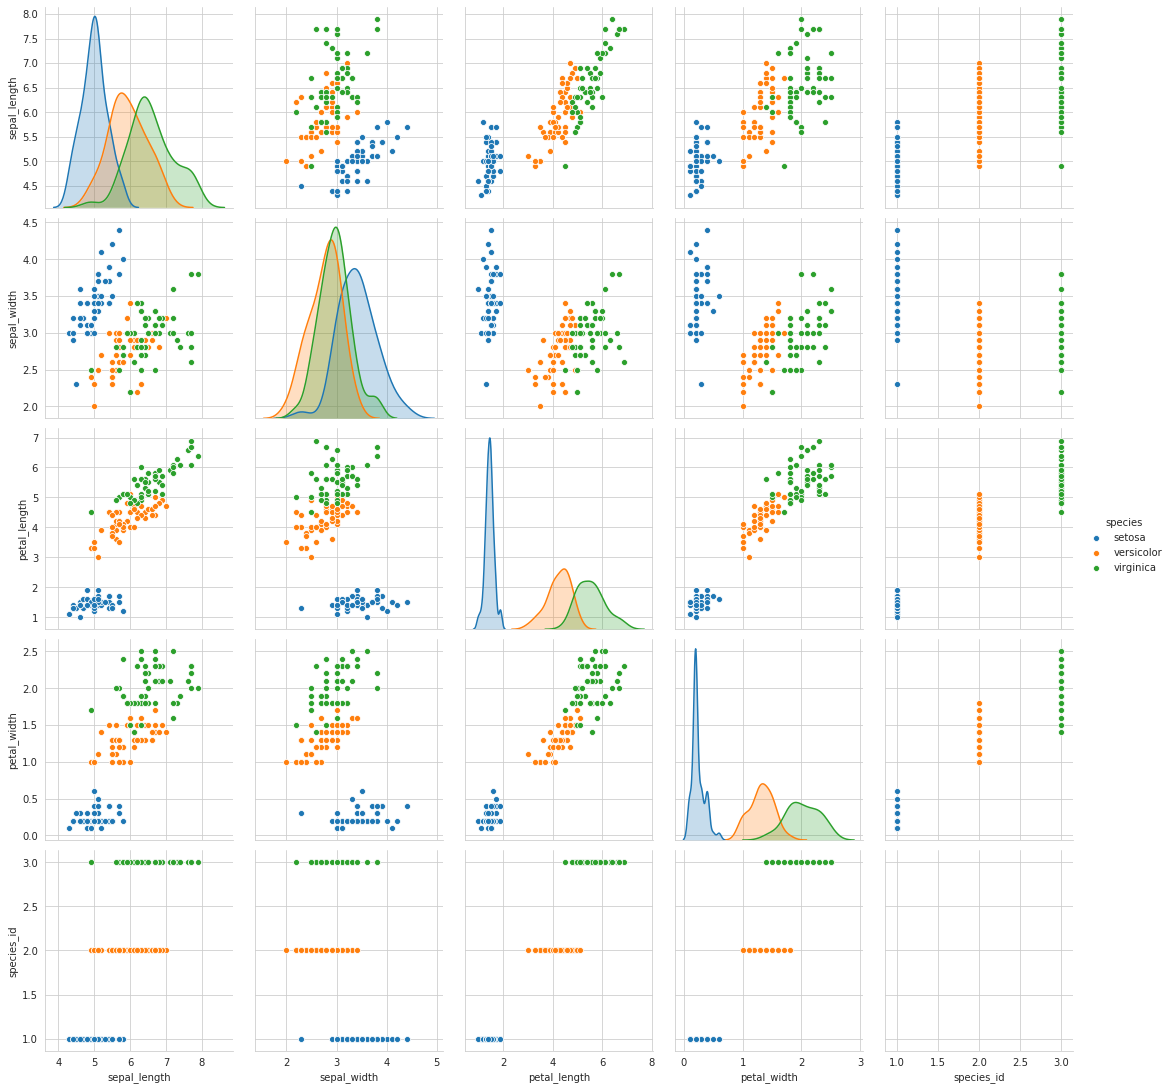

In [9]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="species", height=3);
plt.show()

By getting an overview of plots from pair plot, we can see which two features can well explain/separate the data and then we can use scatter plot between those two features to explore further. From the above plot we can conclude that petal_length and petal_width are the two features which can separate the data very well.

Since we will be getting $n \times n$ plots for $n$ features, pairplot may become complex when we have more number of feature say like 10 or so on.

## ***3. Box plots:***
[Documentation.](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

This is the type of plot that can be used to obtain more of the statistical details about the data. The straight lines at the maximum and minimum are also called as whiskers. Points outside of whiskers will be inferred as an outliers. The box plot gives us a representation of 25th, 50th ,75th quartiles. From box plot we can also see the Interquartile range(IQR) where maximum details of the data will be present. It also gives us a clear overview of outlier points in the data.

![texto alternativo](https://pro.arcgis.com/es/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)

[Source.](https://pro.arcgis.com/es/pro-app/help/analysis/geoprocessing/charts/box-plot.htm)

Boxplot is available in seaborn library.

```
sns.boxplot(x='sepal_length',y='species',data=df)
```
where $x$ is the variable to be predicted and $y$ is the independent feature. These box plots comes under univariate analysis, which means that we are exploring data only with one variable i.e here we are just checking influence of feature `axil_nodes` on the class `Survival status` and not between any two independent features.

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


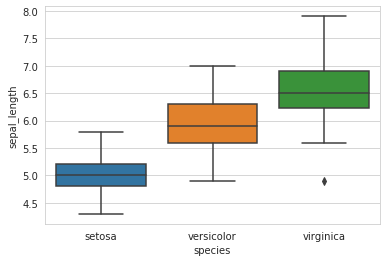

In [11]:
ax = sns.boxplot(x='species', y='sepal_length', data= df)

## ***4. Violin plots:***
[Documentation.](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

The violin plots can be inferred as a combination of Box plot at the middle and distribution plots (Kernel Density Estimation) on both side of the data. This can give us the details of distribution like whether the distribution is mutimodal, Skewness etc. It also give us the useful info like 95% confidence interval. The below image help us grasp some important parts from a violin plot.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/violin_plot.svg" width="500">

[Source.](https://datavizcatalogue.com/methods/violin_plot.html)

Violin plot is also from seaborn package. The code is simple and as follows.





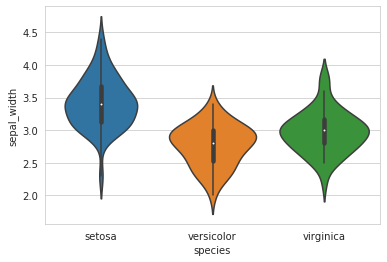

In [12]:
ax = sns.violinplot(x="species", y="sepal_width", data=df)

## ***5. Distribution plot:***

This is one of the best univariate plot to know about the distribution of data. When analyzing effect on dependent variable(output) with respective to a single feature(input), we use distribution plots a lot. It is also readily available in seaborn package. This plot gives us a combination of pdf and histogram in a single figure.

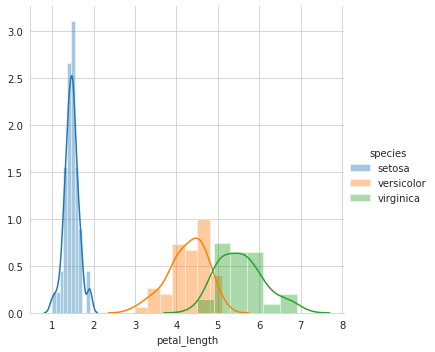

In [15]:
sns.FacetGrid(df,hue='species',height=5).map(sns.distplot,'petal_length').add_legend()